In [1]:
%matplotlib notebook
from matplotlib.pyplot import *
from numpy import *
from audio.coders import *
from bitstream import *

In [2]:
N = 16000

### Random Exponential (Independent) Values

[exponential distributions](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.random.exponential.html)

In [3]:
data = random.exponential(scale=30.0, size=N).astype(uint16)

<IPython.core.display.Javascript object>


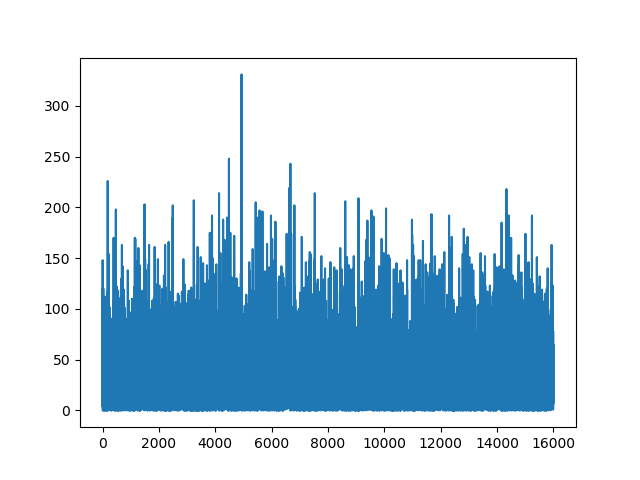

In [4]:
figure()
plot(data)

<IPython.core.display.Javascript object>


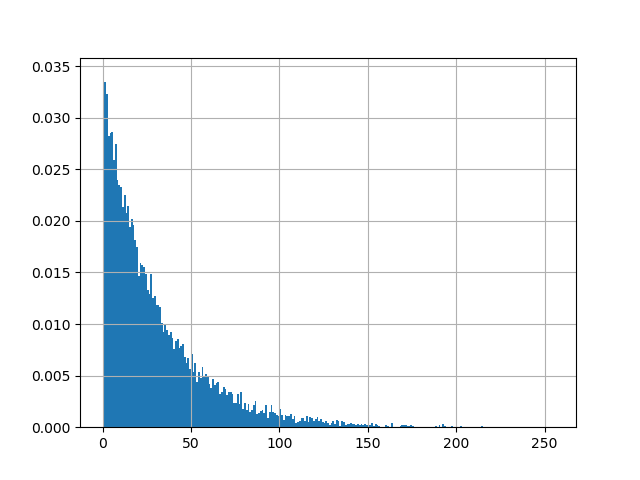

In [5]:
figure()
hist(data, bins=r_[0:256], density=True)
grid()

In [6]:
BitStream(0, unary)

0

In [7]:
BitStream(100, unary)

11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110

In [8]:
N * 16

256000

In [9]:
stream = BitStream(data, unary)

In [10]:
len(stream) / (N * 16.0) * 100.0

190.988671875

In [11]:
BitStream(0, rice(b = 8, signed=False))

000000000

In [12]:
BitStream(1, rice(b = 8, signed=False))

000000010

In [13]:
BitStream(255, rice(b = 8, signed=False))

111111110

In [14]:
BitStream([0,1,255], rice(b = 8, signed=False))

000000000000000010111111110

In [15]:
n = 1024+512+256 + 42
display(BitStream(n, uint16))
display(BitStream(n, rice(b = 8, signed=False)))

0000011100101010

0010101011111110

In [16]:
r = rice.from_frame(data, signed=False)

In [17]:
r = rice(b=6, signed=False)
stream = BitStream(data, r)
len(stream) / (16.0 * N) * 100.0

44.608203125

### Pure Tone

In [18]:
df = 44100
dt = 1.0 / df
t = r_[0:N] * dt
f= 440
data = sin(2*pi*f*t)

In [19]:
import audio.wave as wave
from IPython.display import *
wave.write(data, "A4.wav", df=df)
Audio("A4.wav")

<IPython.core.display.Javascript object>


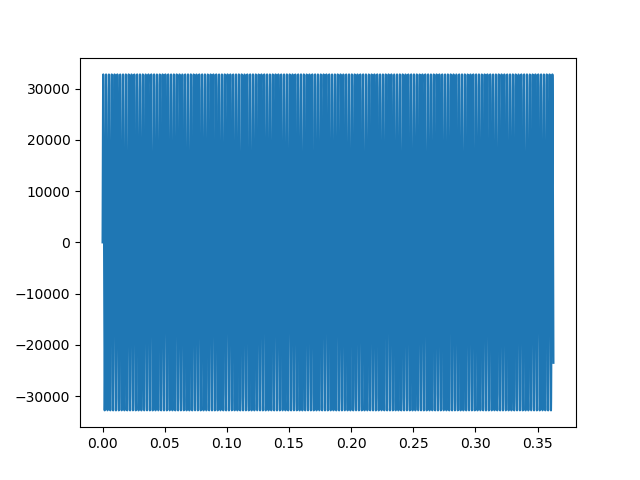

In [20]:
figure()
data = wave.read("A4.wav", scale=False)[0]
plot(t, data)

<IPython.core.display.Javascript object>


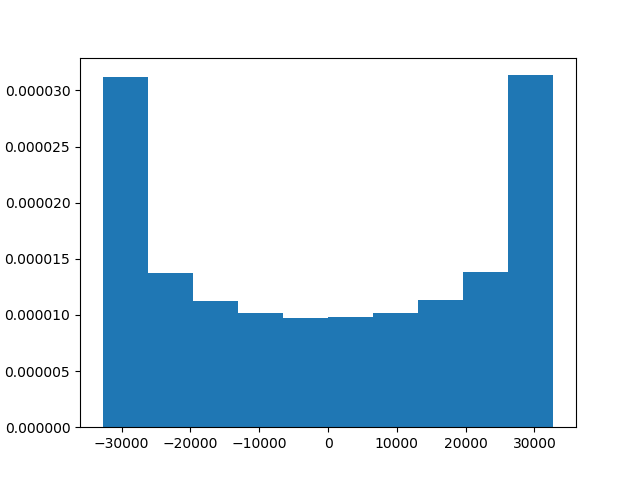

(array([3.11570153e-05, 1.37331197e-05, 1.12821393e-05, 1.01567864e-05,
        9.74670024e-06, 9.86114290e-06, 1.01949340e-05, 1.13107500e-05,
        1.37903410e-05, 3.13572900e-05]),
 array([-3.27680e+04, -2.62145e+04, -1.96610e+04, -1.31075e+04,
        -6.55400e+03, -5.00000e-01,  6.55300e+03,  1.31065e+04,
         1.96600e+04,  2.62135e+04,  3.27670e+04]),
 <a list of 10 Patch objects>)

In [21]:
figure()
hist(data, density=True)

In [22]:
r = rice.from_frame(data, signed=True)
r

rice(b=14, signed=True)

In [23]:
stream = BitStream(data, r)
len(stream) / (16.0 * N) * 100

104.17578125

In [24]:
len(data), len(diff(data))

(16000, 15999)

In [25]:
ddata = r_[data[0], diff(data)]

In [26]:
ddata2 = diff(r_[0, data])
all(ddata2 == ddata)

True

<IPython.core.display.Javascript object>


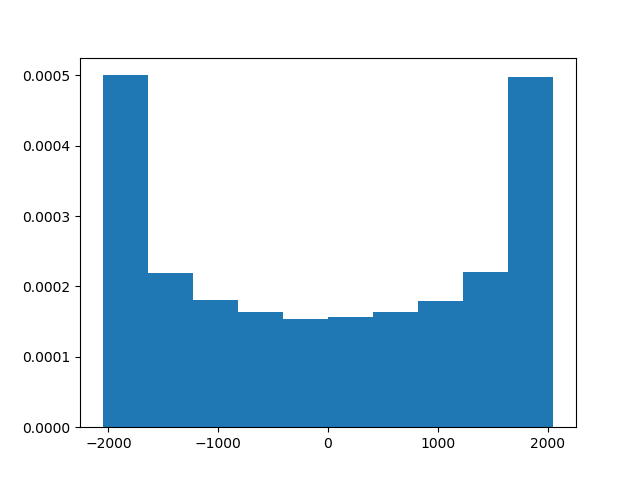

(array([0.00050009, 0.00021893, 0.00018074, 0.0001634 , 0.00015427,
        0.00015671, 0.0001634 , 0.00017861, 0.00022076, 0.00049735]),
 array([-2054. , -1643.2, -1232.4,  -821.6,  -410.8,     0. ,   410.8,
          821.6,  1232.4,  1643.2,  2054. ]),
 <a list of 10 Patch objects>)

In [27]:
figure()
hist(ddata, density=True)

In [28]:
stream = BitStream(ddata, rice.from_frame(ddata, signed=True))
len(stream)/ (16.0 * N) * 100

79.49140625

In [29]:
all(cumsum(ddata) == data)

True

In [30]:
dddata = diff(r_[0, ddata])
r = rice.from_frame(dddata, signed=True)
#display(r)
#r = rice(b=12, signed=True)
stream = BitStream(dddata, r)
len(stream)/ (16.0 * N) * 100

54.731249999999996

In [31]:
from audio.index import *
import nltk
nltk.download("timit")

[nltk_data] Downloading package timit to /home/boisgera/nltk_data...
[nltk_data]   Package timit is already up-to-date!


True

In [32]:
wave.write(search("circle")[0].parent.audio, "circle.wav", df=16000)

In [33]:
Audio("circle.wav")